## 회귀 실습 - 자전거 대여 수요 예측 

In [232]:
import pandas as pd
bike_df=pd.read_csv('https://raw.githubusercontent.com/corazzon/KaggleStruggle/master/bike-sharing-demand/data/train.csv')
bike_df[:2]
test = pd.read_csv("https://raw.githubusercontent.com/corazzon/KaggleStruggle/master/bike-sharing-demand/data/test.csv") 

In [233]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [234]:
#datetime column의 type 을 datetime타입으로 변경 
bike_df['datetime']=bike_df['datetime'].apply(pd.to_datetime)

#datetime에서 년,월, 일 ,시간 추출
bike_df['year']=bike_df['datetime'].apply(lambda x:x.year)
bike_df['month']=bike_df['datetime'].apply(lambda x:x.month)
bike_df['day']=bike_df['datetime'].apply(lambda x:x.day)
bike_df['hour']=bike_df['datetime'].apply(lambda x:x.hour)

#casual+registered= count 이므로 지움 , 오히려 상관도 높아서 예측 저해 가능성 
bike_df.drop(['datetime','casual','registered'],axis=1,inplace=True )
bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


IndexError: index 4 is out of bounds for axis 0 with size 4

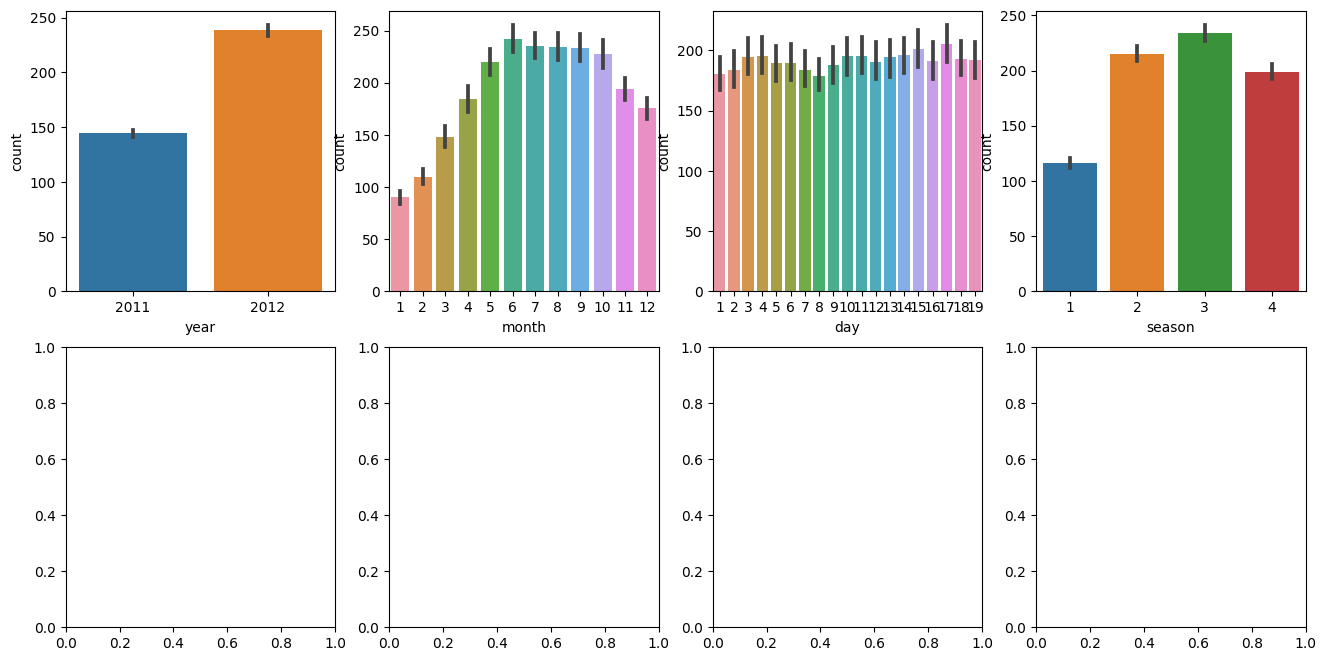

In [235]:
#주요 컬럼별 target(count)가 어떻게 분포 되어있는지 시각화
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs= plt.subplots(figsize=(16,8), ncols=4, nrows=2) #총 8개 컬럼
cat_features=['year','month','day','season','hour','holiday','weather','workingday']
#cat_features에 있는 모든 컬럼별로 개별 칼럼값에 따른 count합을 barplot으로 시각화
for i , feature in enumerate(cat_features):
    row=int(1/6)
    col=i%6
    sns.barplot(x=feature,y='count', data=bike_df,ax=axs[row][col])

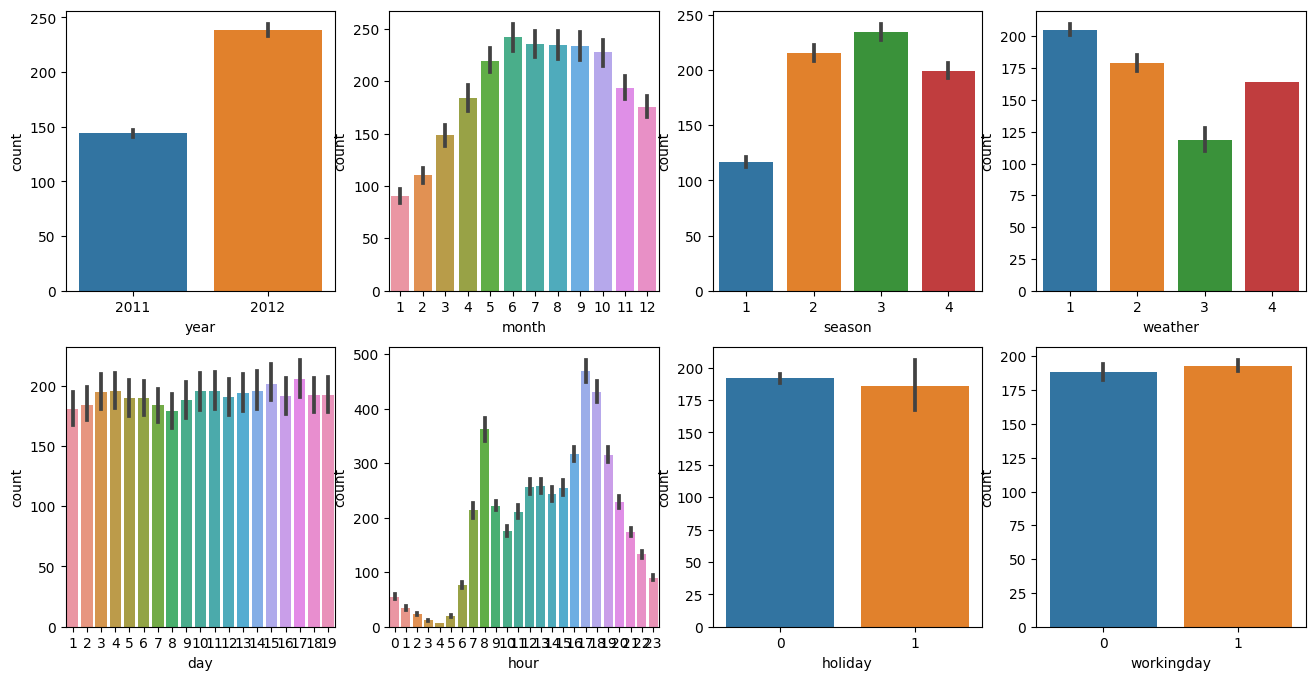

In [236]:
fig, axs= plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col]) 

year : 2012 상대적으로 높음 -> 시간이 지날수록 대여 횟수 지속적 증가
month : 123 낮고 6789 높음 
season: 1,4 봄겨울 낮고 2,3 여름가을  높음
weather : 3,4 눈비 낮고 1,2, 맑거나 약간안개 높음
hour: 8,17,18 출퇴근 시간 상대 높음
day: 그닥 상관 없음
holiday , working day : working=1 주중이 상대적으로 높음 

In [237]:
bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

<Axes: xlabel='month'>

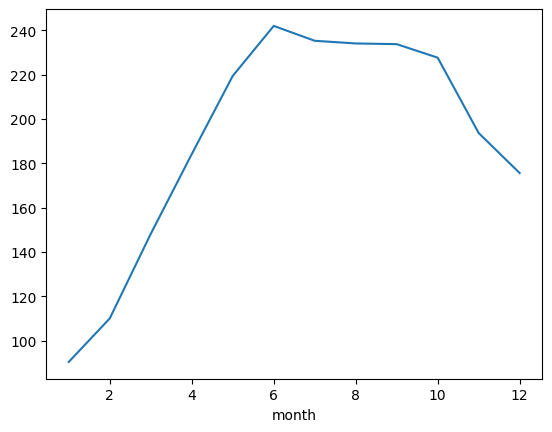

In [221]:
#월 별 대여 횟수 count 메소드 안돼
from sklearn.linear_model import LinearRegression
bike_df= bike_df.groupby('month')['count'].mean()
temp.plot()

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
X = bike_df.drop(['count'] ,axis = 1)
y = bike_df['count']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
#MSE, RMSE
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred))) 
#오류가 너무크다 

20393.211632517123
142.80480255410572


## 로그변환 

In [148]:
y.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

<Axes: ylabel='Frequency'>

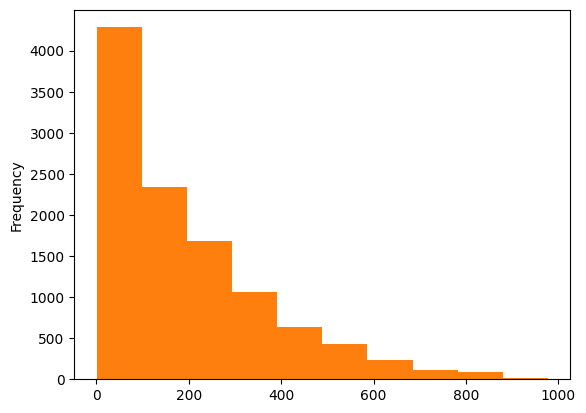

In [239]:
y.plot(kind='hist')
y.plot.hist()
#오류가 클 경우 target값의 분포가 왜곡인지 확인-> 정규분포가 제일 좋음 
#0~200으로 쏠림  - 로그적용 

In [240]:
#로그변환 np.log1p() +1 오버플로 / 언더플로우 방지 -> expm1() 복원 
np.log1p(0) 

0.0

<Axes: ylabel='Frequency'>

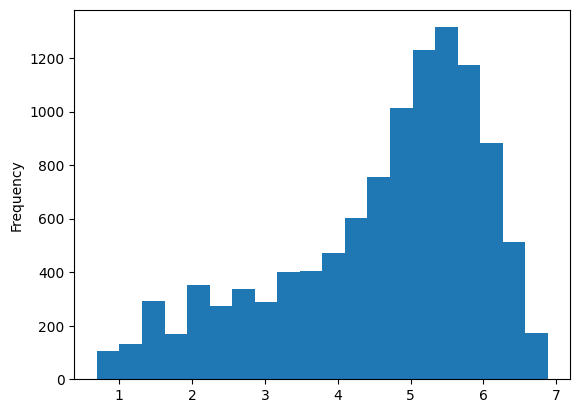

In [241]:
y_new= np.log1p(y)
y_new.plot(kind='hist', bins=20)

<Axes: >

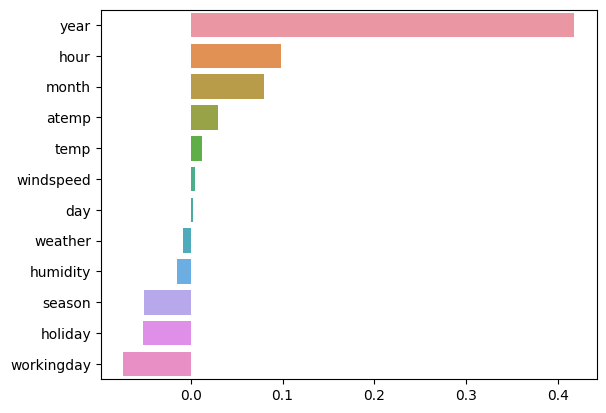

In [249]:
#회귀 계수값 시각화 
coef=pd.Series(lr_reg.coef_, index=X.columns)
coef_sort=coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [242]:
### 로그반환 복원 후 학습 
X_train,X_test,y_train,y_test = train_test_split(X,y_new, test_size=0.2)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

MSE=mean_squared_error(y_test,pred)
RMSE=mean_squared_error(np.expm1(y_test),np.expm1(pred),squared=False)
RMSE

162.30383640487747

In [243]:
np.expm1(y_new) #로그복원 

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
10881    336.0
10882    241.0
10883    168.0
10884    129.0
10885     88.0
Name: count, Length: 10886, dtype: float64

183.2495663524527 -> 159.39646676185808 RMSE 별차이 없음

로그변환 np.log1p -> 로그복원 np.expm1() 
목적: 정규분포꼴로 만들기 위해
rmsle() root mean square log error , 사이킷런 제공 x 직접 만들어야함 
- 주의 ! overflow or underflow 발생 가능성 -> np.log1p 

In [244]:
## one-hot encoding 

In [245]:
bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


In [246]:
X_new=X.copy()
X_new=pd.get_dummies(X,columns=['season', 'holiday','workingday','weather','year','month','day'])

X_train,X_test,y_train,y_test = train_test_split(X,y_new, test_size=0.2, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

MSE=mean_squared_error(y_test,pred)
RMSE=mean_squared_error(np.expm1(y_test),np.expm1(pred),squared=False)
RMSE

161.6169826781938